In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/ML2022-1/PROYECTO-DNA

/content/drive/MyDrive/ML2022-1/PROYECTO-DNA


In [ ]:
import pip
import sys
import os
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import graphviz
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, mean_squared_error,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve,RocCurveDisplay
from imblearn.over_sampling import SMOTE, ADASYN
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import RMSprop, SGD, Adam
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV
import tensorflow as tf
import pickle

In [ ]:
dataset = pd.read_csv('codon_usage.csv')
dataset

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Kingdom,DNAtype,SpeciesID,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,CUU,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,vrl,0,100217,1995,Epizootic haematopoietic necrosis virus,0.01654,0.01203,0.00050,0.00351,0.01203,...,0.00451,0.01303,0.03559,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000
1,vrl,0,100220,1474,Bohle iridovirus,0.02714,0.01357,0.00068,0.00678,0.00407,...,0.00136,0.01696,0.03596,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000
2,vrl,0,100755,4862,Sweet potato leaf curl virus,0.01974,0.0218,0.01357,0.01543,0.00782,...,0.00596,0.01974,0.02489,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144
3,vrl,0,100880,1915,Northern cereal mosaic virus,0.01775,0.02245,0.01619,0.00992,0.01567,...,0.00366,0.01410,0.01671,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000
4,vrl,0,100887,22831,Soil-borne cereal mosaic virus,0.02816,0.01371,0.00767,0.03679,0.01380,...,0.00604,0.01494,0.01734,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13023,pri,0,9601,1097,Pongo pygmaeus abelii,0.02552,0.03555,0.00547,0.01367,0.01276,...,0.00820,0.01367,0.01094,0.01367,0.02279,0.02005,0.04102,0.00091,0.00091,0.00638
13024,pri,1,9601,2067,mitochondrion Pongo pygmaeus abelii,0.01258,0.03193,0.01984,0.00629,0.01451,...,0.00145,0.00000,0.00048,0.00194,0.01306,0.01838,0.00677,0.00242,0.00097,0.01887
13025,pri,1,9602,1686,mitochondrion Pongo pygmaeus pygmaeus,0.01423,0.03321,0.01661,0.00356,0.01127,...,0.00000,0.00000,0.00000,0.00178,0.01661,0.02788,0.00297,0.00356,0.00119,0.02017
13026,pri,0,9606,40662582,Homo sapiens,0.01757,0.02028,0.00767,0.01293,0.01319,...,0.01142,0.01217,0.01196,0.02178,0.02510,0.02896,0.03959,0.00099,0.00079,0.00156


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13028 entries, 0 to 13027
Data columns (total 69 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Kingdom      13028 non-null  object 
 1   DNAtype      13028 non-null  int64  
 2   SpeciesID    13028 non-null  int64  
 3   Ncodons      13028 non-null  int64  
 4   SpeciesName  13028 non-null  object 
 5   UUU          13028 non-null  object 
 6   UUC          13028 non-null  object 
 7   UUA          13028 non-null  float64
 8   UUG          13028 non-null  float64
 9   CUU          13028 non-null  float64
 10  CUC          13028 non-null  float64
 11  CUA          13028 non-null  float64
 12  CUG          13028 non-null  float64
 13  AUU          13028 non-null  float64
 14  AUC          13028 non-null  float64
 15  AUA          13028 non-null  float64
 16  AUG          13028 non-null  float64
 17  GUU          13028 non-null  float64
 18  GUC          13028 non-null  float64
 19  GUA 

Verificando Datos únicos

In [ ]:
dataset.nunique() / len(dataset)

Kingdom        0.000844
DNAtype        0.000844
SpeciesID      0.949340
Ncodons        0.545210
SpeciesName    0.999079
                 ...   
GAA            0.370510
GAG            0.359687
UAA            0.053961
UAG            0.032392
UGA            0.137089
Length: 69, dtype: float64

In [ ]:
dataset.isna().sum()

Kingdom        0
DNAtype        0
SpeciesID      0
Ncodons        0
SpeciesName    0
              ..
GAA            0
GAG            0
UAA            0
UAG            0
UGA            0
Length: 69, dtype: int64

In [ ]:
dataset["Kingdom"].value_counts()

bct    2920
vrl    2832
pln    2523
vrt    2077
inv    1345
mam     572
phg     220
rod     215
pri     180
arc     126
plm      18
Name: Kingdom, dtype: int64

In [ ]:
dataset["DNAtype"].value_counts()

0     9267
1     2899
2      816
4       31
12       5
3        2
9        2
5        2
11       2
6        1
7        1
Name: DNAtype, dtype: int64

In [ ]:
dataset['UUU'].map(type)

0          <class 'str'>
1          <class 'str'>
2          <class 'str'>
3          <class 'str'>
4          <class 'str'>
              ...       
13023    <class 'float'>
13024    <class 'float'>
13025    <class 'float'>
13026    <class 'float'>
13027    <class 'float'>
Name: UUU, Length: 13028, dtype: object

In [ ]:
dataset.drop(['SpeciesID','SpeciesName'], axis=1, inplace=True)
dataset

,Kingdom,DNAtype,Ncodons,UUU,UUC,UUA,UUG,CUU,CUC,CUA,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,vrl,0,1995,0.01654,0.01203,0.00050,0.00351,0.01203,0.03208,0.00100,...,0.00451,0.01303,0.03559,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000
1,vrl,0,1474,0.02714,0.01357,0.00068,0.00678,0.00407,0.02849,0.00204,...,0.00136,0.01696,0.03596,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000
2,vrl,0,4862,0.01974,0.0218,0.01357,0.01543,0.00782,0.01111,0.01028,...,0.00596,0.01974,0.02489,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144
3,vrl,0,1915,0.01775,0.02245,0.01619,0.00992,0.01567,0.01358,0.00940,...,0.00366,0.01410,0.01671,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000
4,vrl,0,22831,0.02816,0.01371,0.00767,0.03679,0.01380,0.00548,0.00473,...,0.00604,0.01494,0.01734,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13023,pri,0,1097,0.02552,0.03555,0.00547,0.01367,0.01276,0.02097,0.00820,...,0.00820,0.01367,0.01094,0.01367,0.02279,0.02005,0.04102,0.00091,0.00091,0.00638
13024,pri,1,2067,0.01258,0.03193,0.01984,0.00629,0.01451,0.05322,0.07644,...,0.00145,0.00000,0.00048,0.00194,0.01306,0.01838,0.00677,0.00242,0.00097,0.01887
13025,pri,1,1686,0.01423,0.03321,0.01661,0.00356,0.01127,0.05042,0.09609,...,0.00000,0.00000,0.00000,0.00178,0.01661,0.02788,0.00297,0.00356,0.00119,0.02017
13026,pri,0,40662582,0.01757,0.02028,0.00767,0.01293,0.01319,0.01959,0.00715,...,0.01142,0.01217,0.01196,0.02178,0.02510,0.02896,0.03959,0.00099,0.00079,0.00156


In [ ]:
dataset.loc[(dataset["UUU"]=='12;I') | (dataset["UUU"]=='non-B hepatitis virus') ]

,Kingdom,DNAtype,Ncodons,UUU,UUC,UUA,UUG,CUU,CUC,CUA,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
486,vrl,0,1238,non-B hepatitis virus,0.04362,0.0210,0.01292,0.01292,0.03554,0.01696,...,0.00081,0.00323,0.00242,0.00162,0.04443,0.01696,0.02423,0.02262,0.00162,0.00000
5063,bct,0,1698,12;I,-,0.0212,0.02356,0.01178,0.01296,0.01060,...,0.03062,0.00118,0.00707,0.00118,0.00000,0.02945,0.02356,0.04476,0.02473,0.00118


In [ ]:
dataset = dataset.drop(dataset[(dataset.UUU=='12;I')].index)#Eliminando ffilas con errores
dataset = dataset.drop(dataset[(dataset.UUU=='non-B hepatitis virus')].index)


Eliminando clases

In [ ]:
dataset = dataset.drop(dataset[(dataset.Kingdom=='mam')].index)
dataset = dataset.drop(dataset[(dataset.Kingdom=='phg')].index)
dataset = dataset.drop(dataset[(dataset.Kingdom=='rod')].index)
dataset = dataset.drop(dataset[(dataset.Kingdom=='pri')].index)
dataset = dataset.drop(dataset[(dataset.Kingdom=='arc')].index)
dataset = dataset.drop(dataset[(dataset.Kingdom=='plm')].index)

In [ ]:
dataset = dataset.drop(dataset[(dataset.DNAtype==4)].index)
dataset = dataset.drop(dataset[(dataset.DNAtype==12)].index)
dataset = dataset.drop(dataset[(dataset.DNAtype==3)].index)
dataset = dataset.drop(dataset[(dataset.DNAtype==9)].index)
dataset = dataset.drop(dataset[(dataset.DNAtype==5)].index)
dataset = dataset.drop(dataset[(dataset.DNAtype==11)].index)
dataset = dataset.drop(dataset[(dataset.DNAtype==6)].index)
dataset = dataset.drop(dataset[(dataset.DNAtype==7)].index)
dataset = dataset.drop(dataset[(dataset.DNAtype==8)].index)
dataset = dataset.drop(dataset[(dataset.DNAtype==10)].index)

In [ ]:
dataset

,Kingdom,DNAtype,Ncodons,UUU,UUC,UUA,UUG,CUU,CUC,CUA,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,vrl,0,1995,0.01654,0.01203,0.00050,0.00351,0.01203,0.03208,0.00100,...,0.00451,0.01303,0.03559,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000
1,vrl,0,1474,0.02714,0.01357,0.00068,0.00678,0.00407,0.02849,0.00204,...,0.00136,0.01696,0.03596,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000
2,vrl,0,4862,0.01974,0.0218,0.01357,0.01543,0.00782,0.01111,0.01028,...,0.00596,0.01974,0.02489,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144
3,vrl,0,1915,0.01775,0.02245,0.01619,0.00992,0.01567,0.01358,0.00940,...,0.00366,0.01410,0.01671,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000
4,vrl,0,22831,0.02816,0.01371,0.00767,0.03679,0.01380,0.00548,0.00473,...,0.00604,0.01494,0.01734,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12056,vrt,1,1549,0.01679,0.03228,0.03486,0.00194,0.05939,0.04906,0.07037,...,0.00000,0.00000,0.00000,0.00000,0.00323,0.01937,0.00581,0.00516,0.00000,0.02905
12057,vrt,0,8062,0.0227,0.01079,0.01191,0.01662,0.01240,0.00670,0.00521,...,0.00360,0.01898,0.00558,0.04478,0.01526,0.04317,0.02444,0.00136,0.00012,0.00112
12058,vrt,1,4309,0.03087,0.02367,0.00162,0.00000,0.00209,0.05082,0.06173,...,0.00000,0.00000,0.00000,0.00046,0.00186,0.01764,0.00000,0.01532,0.00000,0.07890
12059,vrt,0,106417,0.01666,0.02917,0.00469,0.01083,0.00876,0.02408,0.00359,...,0.00925,0.01147,0.01630,0.01258,0.03217,0.01540,0.03919,0.00060,0.00039,0.00144


In [ ]:
dataset["Kingdom"]=dataset["Kingdom"].replace(["bct"],0)
dataset["Kingdom"]=dataset["Kingdom"].replace(["vrl"],1)
dataset["Kingdom"]=dataset["Kingdom"].replace(["pln"],2)
dataset["Kingdom"]=dataset["Kingdom"].replace(["vrt"],3)
dataset["Kingdom"]=dataset["Kingdom"].replace(["inv"],4)

In [ ]:
dataset

,Kingdom,DNAtype,Ncodons,UUU,UUC,UUA,UUG,CUU,CUC,CUA,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,1,0,1995,0.01654,0.01203,0.00050,0.00351,0.01203,0.03208,0.00100,...,0.00451,0.01303,0.03559,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000
1,1,0,1474,0.02714,0.01357,0.00068,0.00678,0.00407,0.02849,0.00204,...,0.00136,0.01696,0.03596,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000
2,1,0,4862,0.01974,0.0218,0.01357,0.01543,0.00782,0.01111,0.01028,...,0.00596,0.01974,0.02489,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144
3,1,0,1915,0.01775,0.02245,0.01619,0.00992,0.01567,0.01358,0.00940,...,0.00366,0.01410,0.01671,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000
4,1,0,22831,0.02816,0.01371,0.00767,0.03679,0.01380,0.00548,0.00473,...,0.00604,0.01494,0.01734,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12056,3,1,1549,0.01679,0.03228,0.03486,0.00194,0.05939,0.04906,0.07037,...,0.00000,0.00000,0.00000,0.00000,0.00323,0.01937,0.00581,0.00516,0.00000,0.02905
12057,3,0,8062,0.0227,0.01079,0.01191,0.01662,0.01240,0.00670,0.00521,...,0.00360,0.01898,0.00558,0.04478,0.01526,0.04317,0.02444,0.00136,0.00012,0.00112
12058,3,1,4309,0.03087,0.02367,0.00162,0.00000,0.00209,0.05082,0.06173,...,0.00000,0.00000,0.00000,0.00046,0.00186,0.01764,0.00000,0.01532,0.00000,0.07890
12059,3,0,106417,0.01666,0.02917,0.00469,0.01083,0.00876,0.02408,0.00359,...,0.00925,0.01147,0.01630,0.01258,0.03217,0.01540,0.03919,0.00060,0.00039,0.00144


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

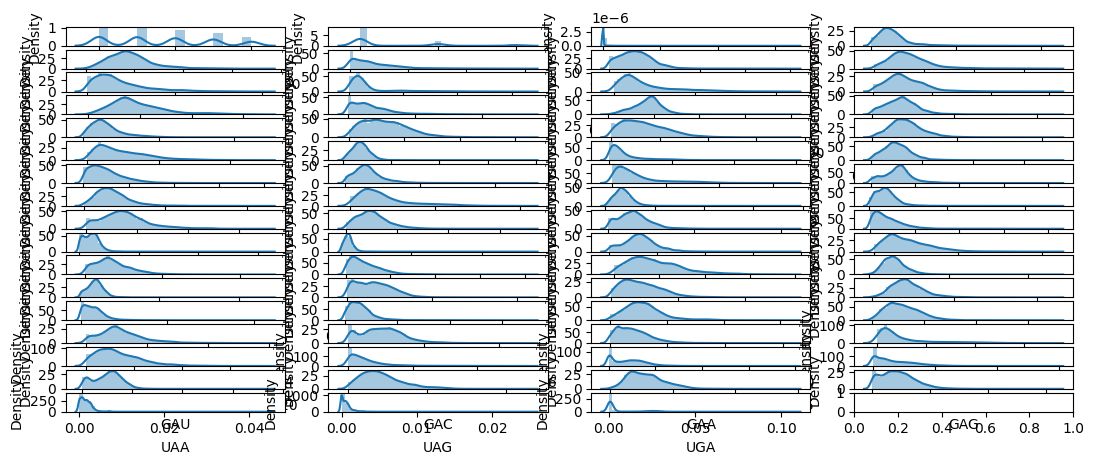

In [ ]:
width = 13
height = 5

plt.style.use("default")

figure, axes = plt.subplots(nrows=17, ncols=4, figsize=(width, height))

for column, axe in zip(dataset, axes.flatten()):
    sns.distplot(dataset[column], ax=axe)#
    
plt.tight_layout()

In [ ]:
x = dataset.drop(["Kingdom","DNAtype"], axis=1)#,"_varianceCI12", "_varianceRE12"

y1 = dataset["Kingdom"]
y2 = dataset["DNAtype"]

In [ ]:
from sklearn.preprocessing import scale
X = scale(x) #numpy array

In [ ]:
from sklearn.model_selection import train_test_split
x_train1, x_test1, y_train1, y_test1 = train_test_split(X, y1, test_size=0.2, random_state=42)

Cumulative Variances (Percentage):
[30.66507174 46.71579664 52.50326735 56.55938378 59.98272394 63.05763834
 65.48709461 67.44559784 69.25409158 70.9344613  72.46946923 73.95823851
 75.32164984 76.63651082 77.91097117 79.147724   80.28492996 81.38223791
 82.416684   83.39107571 84.25078177 85.06305825 85.82390071 86.53495168
 87.23000426 87.86310913 88.47174374 89.0561826  89.61436143 90.16526638
 90.6900047  91.19023393 91.6793454  92.14196403 92.56914813 92.98723534
 93.37487711 93.75485888 94.12997913 94.49453343 94.84866539 95.18017885]
Number of components: 42


Text(0, 0.5, 'Explained variance (%)')

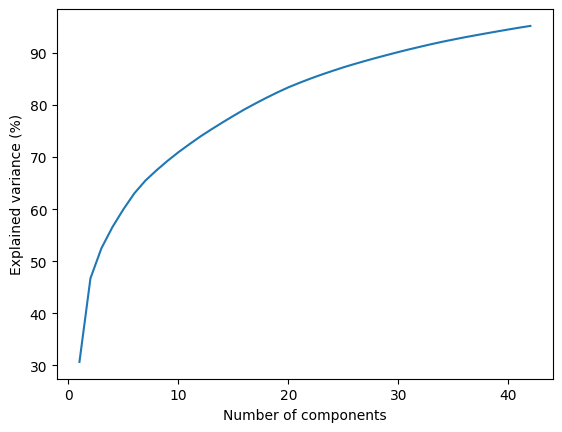

In [ ]:
pca = PCA(n_components=0.95)
X_vis = pca.fit_transform(X)
print("Cumulative Variances (Percentage):")
print(np.cumsum(pca.explained_variance_ratio_ * 100))
components = len(pca.explained_variance_ratio_)
print(f'Number of components: {components}')
# Make the scree plot
plt.plot(range(1, components + 1), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")

In [ ]:
x_train_pca1 = pca.transform(x_train1)
x_test_pca1 = pca.transform(x_test1)

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[42]):
    model = keras.models.Sequential()
    options = {"input_shape": input_shape}
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu", **options))
        options = {}
    model.add(keras.layers.Dense(1, **options))
    optimizer = keras.optimizers.Adam(learning_rate)#keras.optimizers.SGD(learning_rate)
    model.compile(loss="binary_crossentropy", metrics=['accuracy'],optimizer=optimizer)
    return model

In [ ]:
keras_class = keras.wrappers.scikit_learn.KerasClassifier(build_model)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  """Entry point for launching an IPython kernel.


In [ ]:
param_distribs = {
"n_hidden": [ 1, 2, 3],
"n_neurons": np.arange(1, 100),
"learning_rate": reciprocal(3e-4, 3e-1),
}

In [ ]:
class_search_cv = RandomizedSearchCV(keras_class, param_distribs, n_iter=40, cv=3)

In [ ]:
class_search_cv.fit(x_train_pca1, y_train1, epochs=150,
                    validation_data=(x_test_pca1, y_test1),#0.2
                    callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Streaming output truncated to the last 5000 lines.
Epoch 13/150
195/195 [==============================] - 0s 2ms/step - loss: -11.4726 - accuracy: 0.3732 - val_loss: -11.4713 - val_accuracy: 0.3837
Epoch 14/150
195/195 [==============================] - 1s 3ms/step - loss: -11.6011 - accuracy: 0.3805 - val_loss: -11.6317 - val_accuracy: 0.3828
Epoch 15/150
195/195 [==============================] - 1s 3ms/step - loss: -11.7795 - accuracy: 0.3810 - val_loss: -11.8269 - val_accuracy: 0.3811
Epoch 16/150
195/195 [==============================] - 0s 2ms/step - loss: -12.0265 - accuracy: 0.3766 - val_loss: -11.9993 - val_accuracy: 0.3785
Epoch 17/150
195/195 [==============================] - 0s 2ms/step - loss: -12.1595 - accuracy: 0.3787 - val_loss: -12.0638 - val_accuracy: 0.3824
Epoch 18/150
195/195 [==============================] - 1s 3ms/step - loss: -12.2387 - accuracy: 0.3882 - val_loss: -12.2267 - val_accuracy: 0.3974
Epoch 19/150
195/195 [==============================] - 0s 2m

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f16b0c76b90>,
                   n_iter=40,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f16b03523d0>,
                                        'n_hidden': [1, 2, 3],
                                        'n_neurons': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [ ]:
class_search_cv.best_params_

{'learning_rate': 0.0009513540328872028, 'n_hidden': 3, 'n_neurons': 16}

In [ ]:
class_search_cv.best_score_

0.4678611358006795

In [ ]:
modelnn2 = class_search_cv.best_estimator_.model

In [ ]:
score2=modelnn2.evaluate(x_train_pca1, y_train1)

292/292 [==============================] - 0s 1ms/step - loss: -13.3794 - accuracy: 0.4744


In [ ]:
score=modelnn2.evaluate(x_test_pca1, y_test1)

73/73 [==============================] - 0s 3ms/step - loss: -12.9801 - accuracy: 0.4785


In [ ]:
modelnn =Sequential()
modelnn.add(Dense(16, activation='relu', input_dim=x_train_pca1.shape[1]))
modelnn.add(Dropout(0.5))
modelnn.add(Dense(16, activation='relu'))
modelnn.add(Dropout(0.5))
modelnn.add(Dense(16, activation='relu'))
#modelnn.add(Dropout(0.5))
#modelnn.add(Dense(35, activation='relu'))
#modelnn.add(Dropout(0.5))
modelnn.add(Dense(1))#activation='sigmoid'

In [ ]:
modelnn.compile(loss="binary_crossentropy", metrics=['accuracy'],
              optimizer=Adam(learning_rate=0.0009513540328872028)) 

In [ ]:
tf.random.set_seed(42)
history=modelnn.fit(x_train_pca1, 
                    y_train1, 
                    epochs=150, 
          #batch_size=32,
                    callbacks=[keras.callbacks.EarlyStopping(patience=10)],
                    validation_data=(x_test_pca1, y_test1))

Epoch 1/150
292/292 [==============================] - 1s 3ms/step - loss: -6.1161 - accuracy: 0.2442 - val_loss: -10.1977 - val_accuracy: 0.2489
Epoch 2/150
292/292 [==============================] - 1s 2ms/step - loss: -9.4202 - accuracy: 0.2442 - val_loss: -9.9996 - val_accuracy: 0.2489
Epoch 3/150
292/292 [==============================] - 1s 2ms/step - loss: -9.7471 - accuracy: 0.2426 - val_loss: -10.0247 - val_accuracy: 0.2489
Epoch 4/150
292/292 [==============================] - 1s 2ms/step - loss: -9.9518 - accuracy: 0.2423 - val_loss: -10.0493 - val_accuracy: 0.2489
Epoch 5/150
292/292 [==============================] - 1s 2ms/step - loss: -9.9607 - accuracy: 0.2449 - val_loss: -10.0184 - val_accuracy: 0.2489
Epoch 6/150
292/292 [==============================] - 1s 2ms/step - loss: -10.0860 - accuracy: 0.2443 - val_loss: -10.0572 - val_accuracy: 0.2489
Epoch 7/150
292/292 [==============================] - 1s 2ms/step - loss: -10.1834 - accuracy: 0.2453 - val_loss: -10.2673 

In [ ]:
score=modelnn.evaluate(x_train_pca1, y_train1)

292/292 [==============================] - 0s 1ms/step - loss: -13.5540 - accuracy: 0.4626


In [ ]:
score=modelnn.evaluate(x_test_pca1, y_test1)

73/73 [==============================] - 0s 1ms/step - loss: -13.3205 - accuracy: 0.4648


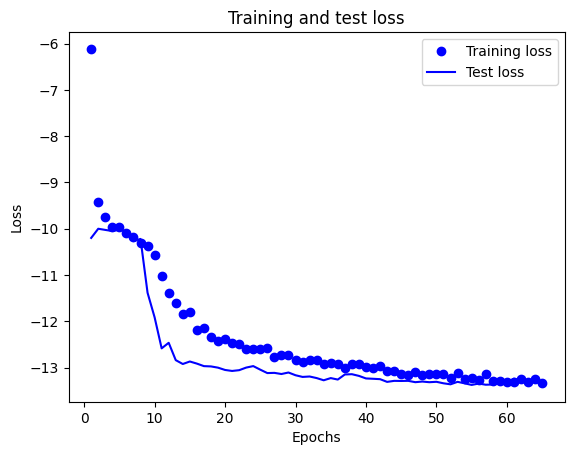

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

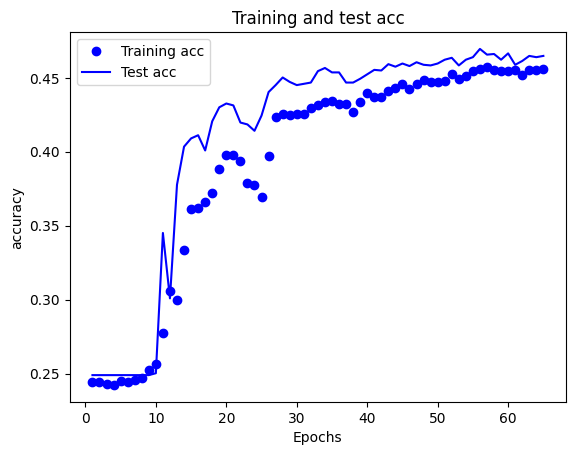

In [ ]:
acc = history.history['accuracy']
acc_loss = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, acc_loss, 'b', label='Test acc')
plt.title('Training and test acc')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [ ]:
predictions_NN_prob=modelnn.predict(x_test_pca1)
predictions_NN_prob = predictions_NN_prob[:,0]
predictions_NN_01 = np.where(predictions_NN_prob > 0.5, 1, 0) #Turn probability to 0-1 binary output

In [ ]:
predictions_NN_01

array([1, 0, 1, ..., 0, 1, 1])

In [ ]:
from sklearn.metrics import confusion_matrix, mean_squared_error,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve,RocCurveDisplay
roc_auc_score(y_test1[:,0],predictions_NN_prob[:,0],multi_class='ovo')

KeyError: ignored

In [ ]:
"""def score():
  print(f"Scores:")
  print(f"Train      = {model.score(x_train_pca1, y_train1):.5}")
  print(f"Validation = {model.score(x_test_pca1 , y_test1):.5}")
  #if hasattr(model, "oob_score_"): print(f"OOB        = {model.oob_score_:.5}")
    
score() """

'def score():\n  print(f"Scores:")\n  print(f"Train      = {model.score(x_train_pca1, y_train1):.5}")\n  print(f"Validation = {model.score(x_test_pca1 , y_test1):.5}")\n  #if hasattr(model, "oob_score_"): print(f"OOB        = {model.oob_score_:.5}")\n    \nscore() '

In [ ]:
"""classifier2 = xgb.XGBClassifier( objective="multi:softmax",booster= "gbtree",seed=7, num_class= 5, random_state=42,learning_rate=0.23,max_depth=6)
classifier2.fit(x_train_pca1, y_train1)"""

'classifier2 = xgb.XGBClassifier( objective="multi:softmax",booster= "gbtree",seed=7, num_class= 5, random_state=42,learning_rate=0.23,max_depth=6)\nclassifier2.fit(x_train_pca1, y_train1)'

In [ ]:
"""def score():
  print(f"Scores:")
  print(f"Train      = {classifier2.score(x_train_pca1, y_train1):.5}")
  print(f"Validation = {classifier2.score(x_test_pca1 , y_test1):.5}")
score() """

'def score():\n  print(f"Scores:")\n  print(f"Train      = {classifier2.score(x_train_pca1, y_train1):.5}")\n  print(f"Validation = {classifier2.score(x_test_pca1 , y_test1):.5}")\nscore() '

In [ ]:
"""kingdomclas=["bacteria", "virus","plant","vertebrate","invertebrate"]"""

'kingdomclas=["bacteria", "virus","plant","vertebrate","invertebrate"]'

In [ ]:
"""#Printing Confusion Matrix
cm = pd.DataFrame(confusion_matrix(y_test1, classifier2.predict(x_test_pca1 )), 
                  index = kingdomclas, 
                  columns = kingdomclas)
print('Confusion Matrix:')
print(cm)
print('\n')
print("Reporte de clasificación")
print(classification_report(y_test1, classifier2.predict(x_test_pca1 ),target_names=kingdomclas,digits=4))"""

'#Printing Confusion Matrix\ncm = pd.DataFrame(confusion_matrix(y_test1, classifier2.predict(x_test_pca1 )), \n                  index = kingdomclas, \n                  columns = kingdomclas)\nprint(\'Confusion Matrix:\')\nprint(cm)\nprint(\'\n\')\nprint("Reporte de clasificación")\nprint(classification_report(y_test1, classifier2.predict(x_test_pca1 ),target_names=kingdomclas,digits=4))'